<H2><b>Introduction<b></h2>
    

<p>The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by 
eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.
IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.
In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of IPL in 2018 was US$6.3 billion,
according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.</p>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

matches = pd.read_csv("D:\IPL\matches.csv")
matches["type"] = "pre-qualifier"
for year in range(2008, 2017):
   final_match_index = matches[matches['season']==year][-1:].index.values[0]
   matches = matches.set_value(final_match_index, "type", "final")
   matches = matches.set_value(final_match_index-1, "type", "qualifier-2")
   matches = matches.set_value(final_match_index-2, "type", "eliminator")
   matches = matches.set_value(final_match_index-3, "type", "qualifier-1")

matches.groupby(["type"])["id"].count()
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,type
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,pre-qualifier
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,pre-qualifier
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,pre-qualifier
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,pre-qualifier
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,pre-qualifier


In [4]:
deliveries = pd.read_csv("D:\IPL\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


<h2>Add team score and team extra columns for each match, each innings</h2>

In [5]:
team_score = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_score.columns = ['match_id', 'Team1_score', 'Team2_score', 'Team1_superover_score', 'Team2_superover_score']
matches_agg = pd.merge(matches, team_score, left_on = 'id', right_on = 'match_id', how = 'outer')

team_extras = deliveries.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg = pd.merge(matches_agg, team_extras, on = 'match_id', how = 'outer')

#Reorder the columns to make the data more readable
cols = ['match_id', 'season','city','date','team1','team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'Team1_score','Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score', 'Team2_superover_score', 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'type', 'venue', 'umpire1', 'umpire2', 'umpire3']
matches_agg = matches_agg[cols]
matches_agg.head(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,type,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,NaN,NaN,NaN,BB McCullum,pre-qualifier,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,NaN,NaN,NaN,NaN,MEK Hussey,pre-qualifier,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


<h2>Batsmen aggregates</h2>

In [7]:
batsman_grp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = deliveries[ deliveries["batsman_runs"] == 4]
sixes = deliveries[ deliveries["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(2)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2008,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,10.0,13.0,216.44,NaN,NaN
1,2008,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,1.0,0.0,100.00,caught,CL White


<h2>Bowler Aggregates</h2>

In [8]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(2)

,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2008,1,1,Royal Challengers Bangalore,AA Noffke,4,5,0,40,5,1.0,10.0
1,2008,1,1,Royal Challengers Bangalore,CL White,1,2,0,24,2,0.0,24.0


<h2>Team wins in home city vs other cities</h2>

<p>Each team plays two matches against the other teams, one in its home city and other in the home city of the opposite team. It would be interesting see if playing in home city increases a teams chances of a win.</p>

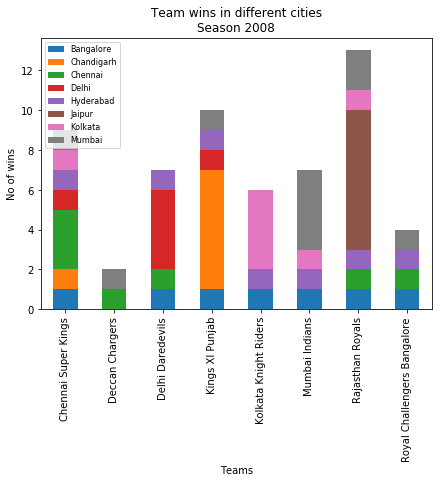

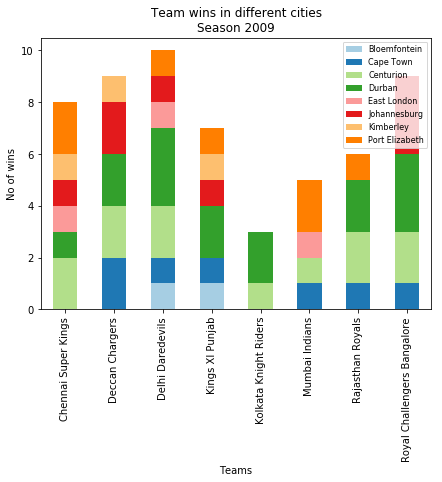

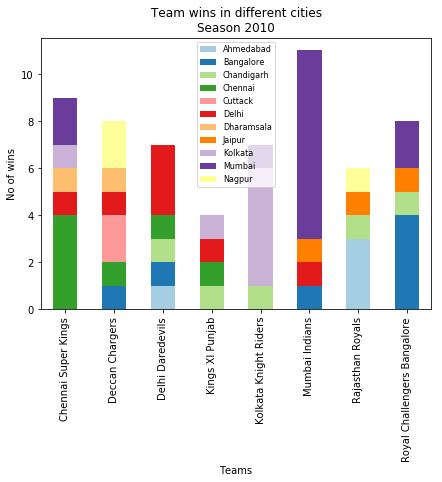

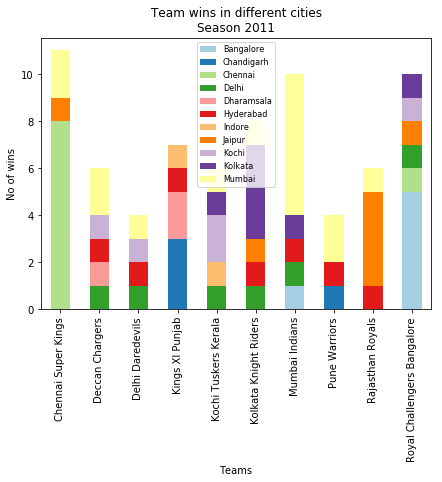

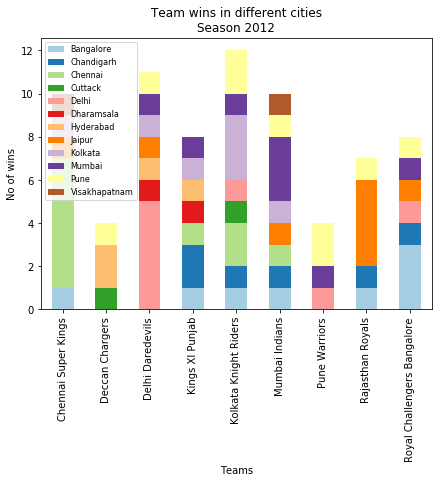

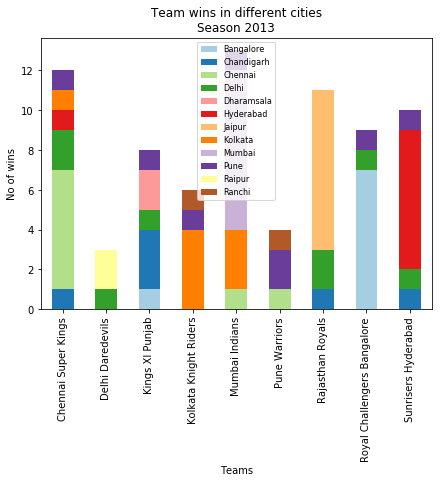

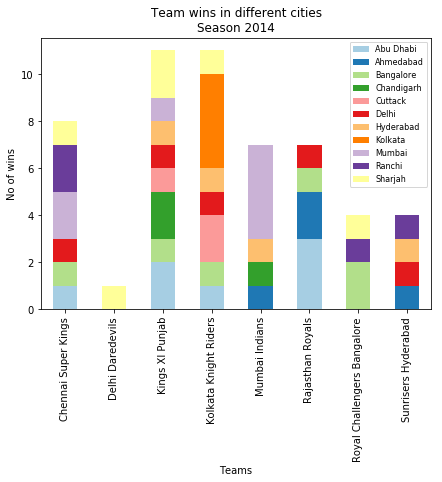

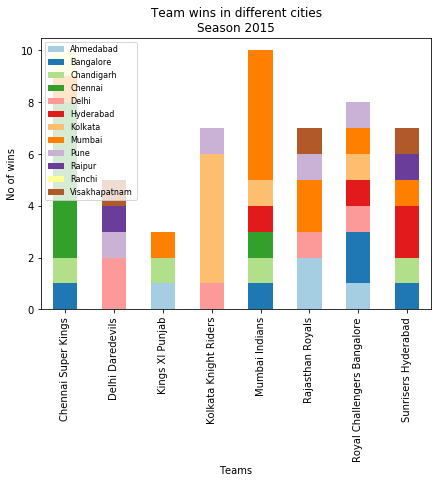

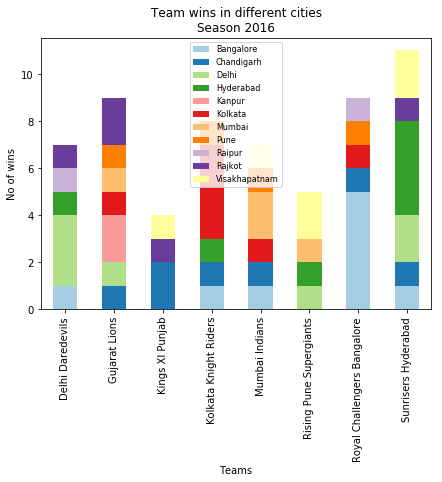

In [11]:
#No of wins by team and season in each city
x, y = 2008, 2017
while x < y:
    wins_percity = matches_agg[matches_agg['season'] == x].groupby(['winner', 'city'])['match_id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches_agg['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

<h2>Top 5 batsmen over seasons</h2>

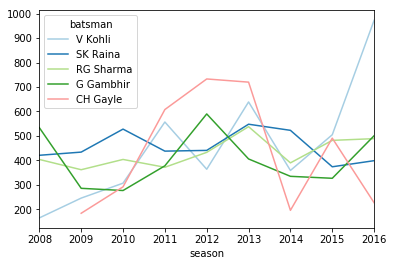

In [12]:
batsman_runsperseason = batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1) #add total column to find batsman with the highest runs
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:5].T.plot()

<h2>Percentage of total runs scored through boundaries for each batsman</h2>

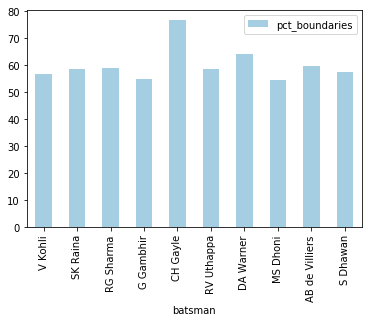

In [13]:
batsman_runs = batsmen.groupby(['batsman'])['batsman_runs', '4s', '6s'].sum().reset_index()
batsman_runs['4s_6s'] = batsman_runs['4s'] * 4 + batsman_runs['6s'] * 6
batsman_runs['pct_boundaries'] = np.round(batsman_runs['4s_6s'] / batsman_runs['batsman_runs'] * 100, 2)
batsman_runs = batsman_runs.sort_values(by = 'batsman_runs', ascending = False)
batsman_runs[:10].plot(x= 'batsman', y = 'pct_boundaries', kind = 'bar')

<h2>Performance of top bowlers over seasons<h2>

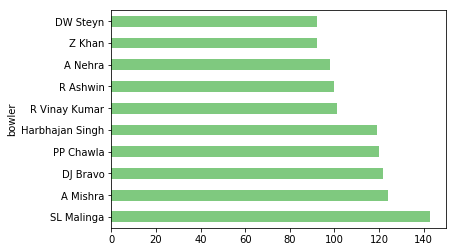

In [14]:
bowlers_wickets = bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending = False, inplace = True)
bowlers_wickets[:10].plot(x= 'bowler', y = 'runs', kind = 'barh', colormap = 'Accent')

<h2>Player of the match</h2>

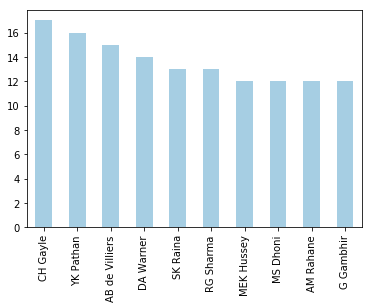

In [15]:
matches['player_of_match'].value_counts()[:10].plot(kind = 'bar')

<h2>Impact of toss on the match outcome</h2>

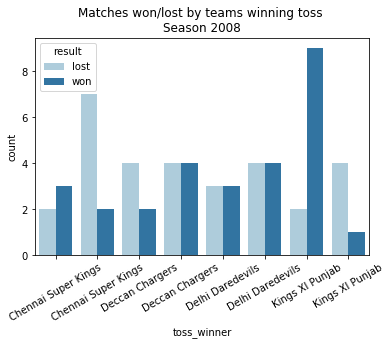

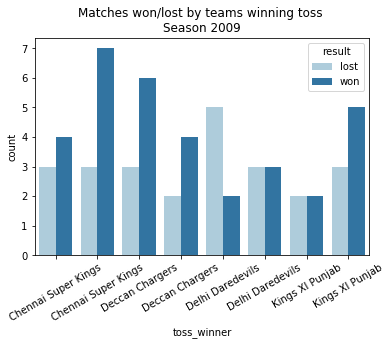

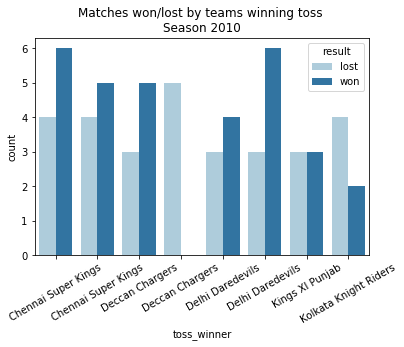

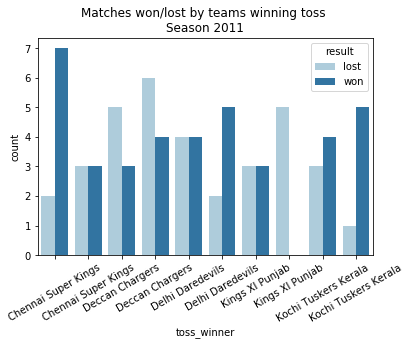

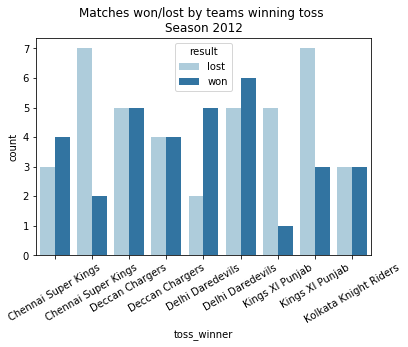

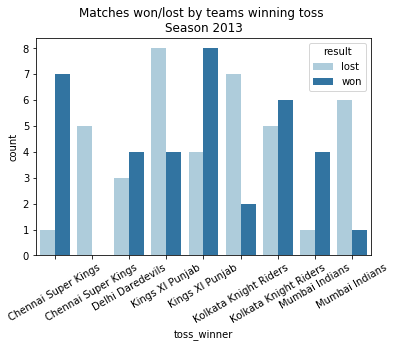

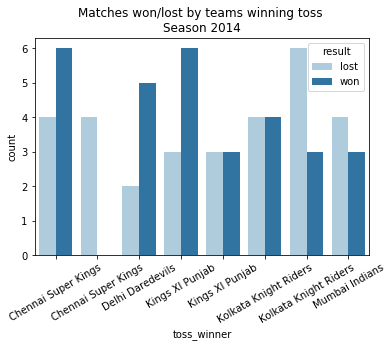

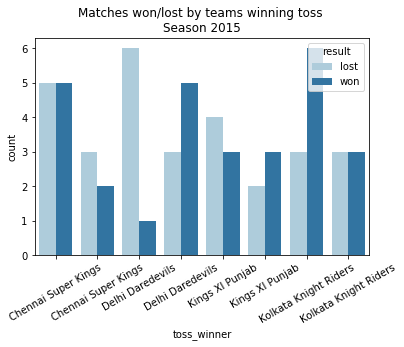

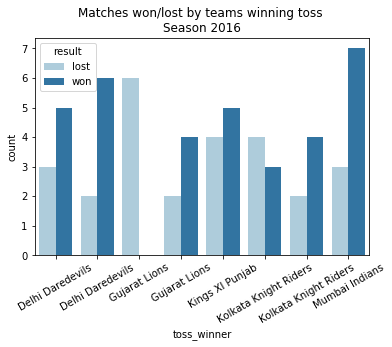

In [16]:
toss = matches_agg.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1